# Ejercicio 4: Estimación de parámetros cosmológicos

_Estima los parámetros cosmológicos $ \Omega_m $ y $ H_0 $ a partir de los datos dados, utilizando el método de las cadenas de Markov._

El _módulo de distancia $ \mu $_ está dado por la expresión

$$
\mu = 25 - 5\log_{10}(H_0/100) + 5\log_{10}(D_L/Mpc)
$$

donde $ H_0 $ es la constante de Hubble y

$$
D_L = \frac{c}{H_0}(1 + z)[\eta(1, \Omega_m) - \eta(1/(1 + z), \Omega_m)]
$$

Aquí, $ c $ es la velocidad de la luz, $ z $ es el corrimiento al rojo, $ \Omega_m $ es la densidad de masa bariónica mas materia oscura y

$$
\eta(a, \Omega_m) = 2\sqrt{s^3 + 1}[a^{-4} - 0.1540sa^{-3} + 0.4304s^2a^{-2} + 0.19097s^3a^{-1} + 0.066941s^4]^{-1/8}
$$

$$
s^3 = (1 - \Omega_m)/\Omega_m
$$

Lo que buscamos es maximizar la función _Likelihood $ L $_, o su logaritmo. Asumiendo una distribución gaussiana:

$$
-ln(L(\vec{x}, \vec{y} | \vec{\theta})) = \frac{1}{2} \sum_{i} \Bigg(\frac{(y_i - \lambda(x_i, \vec{\theta}))^2}{\sigma_i^2}\Bigg)
$$

Posibles fuentes de indeterminación:

*Que omega_m sea cero
*que el tercer factor de eta sea cero
*que el eta de la derecha en dl sea mayor que el de la izquierda

Imprimir
*Tercer factor de eta antes de potenciar
*segundo eta de dl
*valores de omega y h

In [2]:
import matplotlib. pyplot as plt
import numpy as np
import scipy.special as spe
import scipy.stats as stats
from scipy.optimize import minimize
import random
import pylab
import math

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 6)

Text(0,0.5,'$\\mu$')

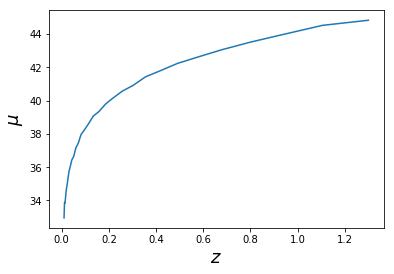

In [7]:
# Extraer datos desde archivos
cov_matrix = np.loadtxt('files/jla_mub_covmatrix.dat')
z = np.loadtxt('files/jla_mub.txt', usecols = 0)
mu = np.loadtxt('files/jla_mub.txt', usecols = 1)
varianza = []

# De cov_matrix solo nos interesa la varianza, que está en la diagonal
for i in range(31):
    varianza.append(cov_matrix[31 * i + i])
    
plt.plot(z, mu)
plt.xlabel(r'$z$', fontsize = 18)
plt.ylabel(r'$\mu$', fontsize = 18)

In [8]:
# Definición de las expresiones matemáticas
def s(omega_m):
    return math.pow((1.0 - omega_m) / omega_m, 1.0 / 3.0)

def eta(a, omega_m):
    return 2.0 * math.sqrt(math.pow(s(omega_m), 3.0) + 1.0) * (math.pow(a, -4.0) - 0.154 * \
           s(omega_m) * math.pow(a, -3.0) + 0.4304 * math.pow(s(omega_m), 2.0) * math.pow(a, -2.0) + \
           0.19097 * math.pow(s(omega_m), 3.0) * math.pow(a, -1.0) + 0.066941 * math.pow(s(omega_m), 4.0))

def D_L(z, H_0, omega_m):
    c = 3e8 # ¿Dimensiones correctas?
    print('eta1 = ' + str(eta(1.0, omega_m)))
    print('eta2 = ' + str(eta(1.0 / (1.0 + z), omega_m)))
    return c * (1.0 + z) * (eta(1.0, omega_m) - eta(1.0 / (1.0 + z), omega_m)) / H_0

def dist_mu(z, H_0, omega_m):
    return 25.0 - 5.0 * math.log(H_0 / 100.0, 10.0) + 5.0 * math.log(D_L(z, H_0, omega_m), 10.0)

def likelihood(H_0, omega_m, mu_list, z_list, var_list):
    suma = 0.0
    
    for i in range(len(mu_list)):
        suma += ((mu_list[i] - dist_mu(z_list[i], H_0, omega_m)) / var_list[i])**2.0
        
    return 0.5 * suma

In [14]:
omega_sample = []
h_sample = []
old_likelhd = 0.0
new_likelhd = 0.0

for i in range(1000):
    h = random.randrange(45.0, 80.0)
    omega = random.random()
    
    print('h = ' + str(h))
    print('omega = ' + str(omega))
    new_likelhd = likelihood(h, omega, mu, z, varianza)
    
"""    if omega > 0.0:
        new_likelhd = likelihood(h, omega, mu, z, varianza)
    
        if new_likelhd > old_likelhd:
            old_likelhd = new_likelhd
            omega_sample.append(omega)
            h_sample.append(h)
        elif random.random() < new_likelhd:
            old_likelhd = new_likelhd
            omega_sample.append(omega)
            h_sample.append(h)"""

h = 55
omega = 0.29660909673834757
eta1 = 8.169353431632283
eta2 = 8.368738082002286


ValueError: math domain error